# Predicting Sales E-Commerce

- Accurate sales forecasts enable retailers to more precisely plan for the future of an e-commerce business. Sales forecasting is an important part of meeting customer expectations and provides insight into how the market will react to any given product.

- We live in the world of e-commerce. We see tons of different stores here and there through the web. Internet made it possible to trade with anyone and everywhere. We can buy goods without leaving our house, we can compare prices in different stores within seconds, we can find what we really want and do not accept just the first more or less suitable offer. And I believe it would be really interesting to look at this world through the data it produces. That's why I decided to play around with e-commerce numbers and try to understand it better.

- The data used in this analysis is taken from Bespoke Aquariums online store dataset "Data |bespoke_data Actual transactions of Sydney retailer ".

- This is a transnational data set which contains all the transactions occurring between 01/05/2020 and 09/12/2023 for a Sydney-based and registered bespoke online retail.The company mainly sells Aquariums products.

- As always, we start our analysis by setting up our environment and by importing necessary libraries.

- We import standard numpy and pandas to be able to perform analysis with Python, also we need data visualization libraries matplotlib and seaborn to output interesting visual findings.


Predicting sales in e-commerce is a critical aspect of managing an online retail business. Accurate sales predictions can help you make informed decisions about inventory management, marketing strategies, and overall business growth. Here are some key methods and considerations for predicting sales in e-commerce:

1. Historical Data Analysis:
   - Start by analyzing your historical sales data. Look at trends, seasonality, and any patterns that may emerge. This data can provide valuable insights into past performance.

2. Time Series Forecasting:
   - Time series forecasting methods, such as ARIMA (AutoRegressive Integrated Moving Average) or Prophet, can be used to predict future sales based on past sales data. These models take into account seasonality and trends.

3. Machine Learning Models:
   - Machine learning models like regression, decision trees, random forests, and neural networks can be trained on historical data to make predictions. Feature engineering, which involves selecting and transforming relevant input features, is crucial for these models.

4. Customer Segmentation:
   - Segment your customer base to identify different groups with varying buying behaviors. This can help you tailor marketing efforts and predict sales more accurately for each segment.

5. External Factors:
   - Consider external factors that can influence sales, such as holidays, economic conditions, and industry trends. Incorporating these factors into your models can improve their accuracy.

6. Inventory Management:
   - Accurate sales predictions are essential for inventory management. Overstocking or understocking can lead to lost sales or excess costs. Make sure your predictions align with your inventory levels.

7. Marketing Campaign Analysis:
   - Analyze the impact of marketing campaigns on sales. Attribution modeling can help you understand which marketing efforts are driving the most sales, allowing you to optimize your marketing strategy.

8. A/B Testing:
   - Conduct A/B tests to experiment with different strategies and determine which ones have the most significant impact on sales. This can help refine your predictions over time.

9. Customer Feedback and Reviews:
   - Pay attention to customer feedback and product reviews. Negative feedback can lead to decreased sales, while positive feedback can boost sales. Monitor sentiment and address customer concerns promptly.

10. Forecasting Tools:
    - Consider using specialized forecasting software or e-commerce analytics platforms that offer pre-built models and dashboards tailored for sales predictions.

11. Continuous Monitoring and Iteration:
    - Sales prediction models should be regularly monitored and updated as new data becomes available. E-commerce is dynamic, and market conditions can change rapidly.

12. Use of AI and Predictive Analytics:
    - Advanced artificial intelligence and predictive analytics techniques, such as deep learning and reinforcement learning, can provide more accurate and automated sales predictions, especially for large datasets.

- Remember that sales predictions are not always 100% accurate, but with consistent refinement and the use of various data sources and models, you can improve their accuracy over time. Additionally, be prepared to adapt your strategies based on the insights gained from your predictions to maximize your e-commerce success.





# Import libraries and Data

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [97]:
df = pd.read_csv('data/bespoke_data.csv', encoding="latin", dtype={'CustomerID': str})


In [98]:
df=df.drop(['Postcode','City'],axis=1)

In [99]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,State
0,95599,5735,Red Sea Aquarium Net Cover 60cm x 60cm,1,9/12/2023 22:58,85.0,0,WA
1,95598,6255,Flipper Cleaner Standard Float,1,9/12/2023 21:00,78.0,0,NSW
2,95597,38824,Fluval P50 Preset Submersible Heater 50W 155cm...,2,9/12/2023 20:42,40.0,0,ACT
3,95595,22427,Aqua One Lifestyle 127 LED Light Unit (52044-L),1,9/12/2023 15:05,119.0,0,QLD
4,95594,38928,Fluval Circulation Pump for FLEX 34L,1,9/12/2023 10:24,45.0,0,VIC


- Just by looking at the first 5 rows of our table, we can understand the structure and datatypes present in our dataset.
- We can notice that we will have to deal with time series data, integers and floats, and categorical, and text data.

# Exploratory Data Analysis(EDA)
- Every data science project starts with EDA as we have to understand what do we have to deal with.
- I divide EDA into 2 types: visual and numerical. Let's start with numerical as the simple pandas method .describe() gives us a lot of useful information.

## Quick statistical overview

In [100]:
df.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice
count,13372.000000,13372.000000,13372.000000,13372.000000
mean,57578.927909,18938.588543,1.407493,101.616322
std,29080.752531,18273.583980,1.727285,217.971654
min,9667.000000,3449.000000,1.000000,0.180000
25%,30525.000000,8324.000000,1.000000,17.000000
50%,61916.500000,11346.000000,1.000000,38.000000
75%,87137.000000,20511.000000,1.000000,91.690000
max,95599.000000,95148.000000,150.000000,7799.980000


- Just a quick look at data with the .describe() method gives us a lot of space to think.
- We can see that not all records have CustomerID data.
- We can also see that the majority of transactions are for quantities from 1 item, majority of items have prices up to 90 AUD.
- We have a few outliers which we will have to deal with later.

## Dealing with types
- .read_csv() method performs basic type check, but it doesn't do that perfectly.
- That's why it is much better to deal with data types in our dataframe before any modifications to prevent additional difficulties.
- Every pandas dataframe has an attribute .dtypes which will help us understand what we currently have and what data has to be casted to correct types.

In [101]:
df.dtypes

InvoiceNo        int64
StockCode        int64
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
State           object
dtype: object

- If we have DateTime data it's better to cast it to DateTime type.
- We saw just the first 5 rows, while pandas during import scanned all the data and found that the type here is numerical.

In [102]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df = df.set_index('InvoiceDate')

In [103]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,State
InvoiceDate,,,,,,,
2023-09-12 22:58:00,95599,5735,Red Sea Aquarium Net Cover 60cm x 60cm,1,85.0,0,WA
2023-09-12 21:00:00,95598,6255,Flipper Cleaner Standard Float,1,78.0,0,NSW
2023-09-12 20:42:00,95597,38824,Fluval P50 Preset Submersible Heater 50W 155cm...,2,40.0,0,ACT
2023-09-12 15:05:00,95595,22427,Aqua One Lifestyle 127 LED Light Unit (52044-L),1,119.0,0,QLD
2023-09-12 10:24:00,95594,38928,Fluval Circulation Pump for FLEX 34L,1,45.0,0,VIC


## Dealing with null values
- Next and very important step is dealing with missing values.

- Normally if you encounter null values in the dataset you have to understand nature of those null values and possible impact they could have on the model.

- There are few strategies that we can use to fix our issue with null values:

    - delete rows with null values
    - delete the feature with null values
    - impute data with mean or median values or use another imputing strategy (method .fillna())

In [104]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
State          7
dtype: int64

- CustomerID has too many 0's and this feature cannot predict a lot so we can just drop it.
- It could be reasonable to create another feature "Amount of orders per customer".
- State has 7 null values so i don't want to drop it because i do not want to loose important feature value.

In [105]:
df['State'].fillna('NSW', inplace=True)

In [106]:
df = df.drop(columns=['CustomerID'])

### Checking out columns separately
- It makes sense to go feature by feature and check what pitfalls we have in our data and also to understand our numbers better.

- Let's continue checking the Description column. Here we can see items that were bought most often.

In [107]:
df['Description'].value_counts().head()

Quantum Reef Essential Mixed Macro Probiotic Salt 20kg Box             89
SeaTorch Titanium Algae Scrapper                                       79
DD-Solutions ClariSea Replacement XL 40m Filter Floss for SK3000       68
DD-Solutions ClariSea Replacement XL (40m) Filter Floss for SK5000A    64
Aqua One Carbon Cartridge 510 2C                                       62
Name: Description, dtype: int64

- Here we can see our best-selling products, items that appear in orders the most often.

# To make it visually more appealing let's create a bar chart for 15 top items

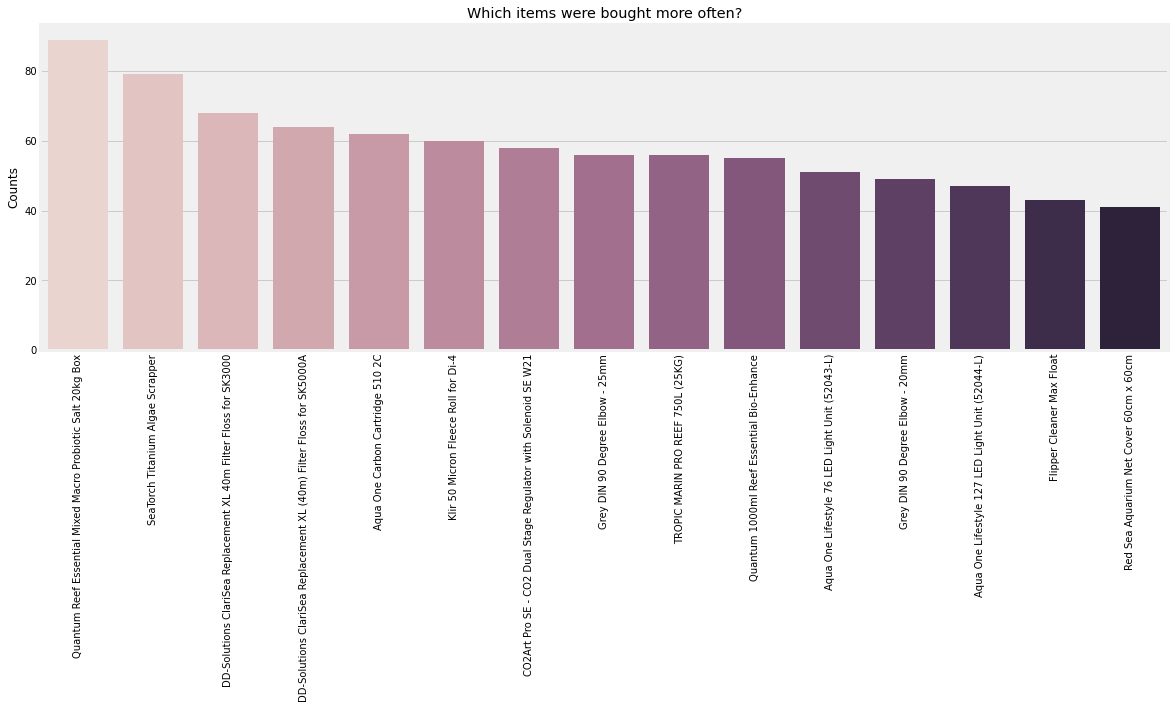

In [108]:
# Which items were bought more often?
item_counts = df['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=item_counts.index, y=item_counts.values, palette=sns.cubehelix_palette(15))
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

In [109]:
df['Description'].value_counts().tail()

FORMULA TWO PELLETS SMALL - 100g                                          1
PhytoPlan 30g                                                             1
Blagdon 5W UVC Quartz Sleeve Set for Inpond 20003000 1051408              1
MAG-FLOAT MINI - FLOATING MAGNET CLEANER FOR GLASS &amp; ACRYLIC (3MM)    1
Aqua One Hose Tap In/Out 12mm                                             1
Name: Description, dtype: int64

- Here we can understand that what products are selling fast so stock management in the store can be improved.

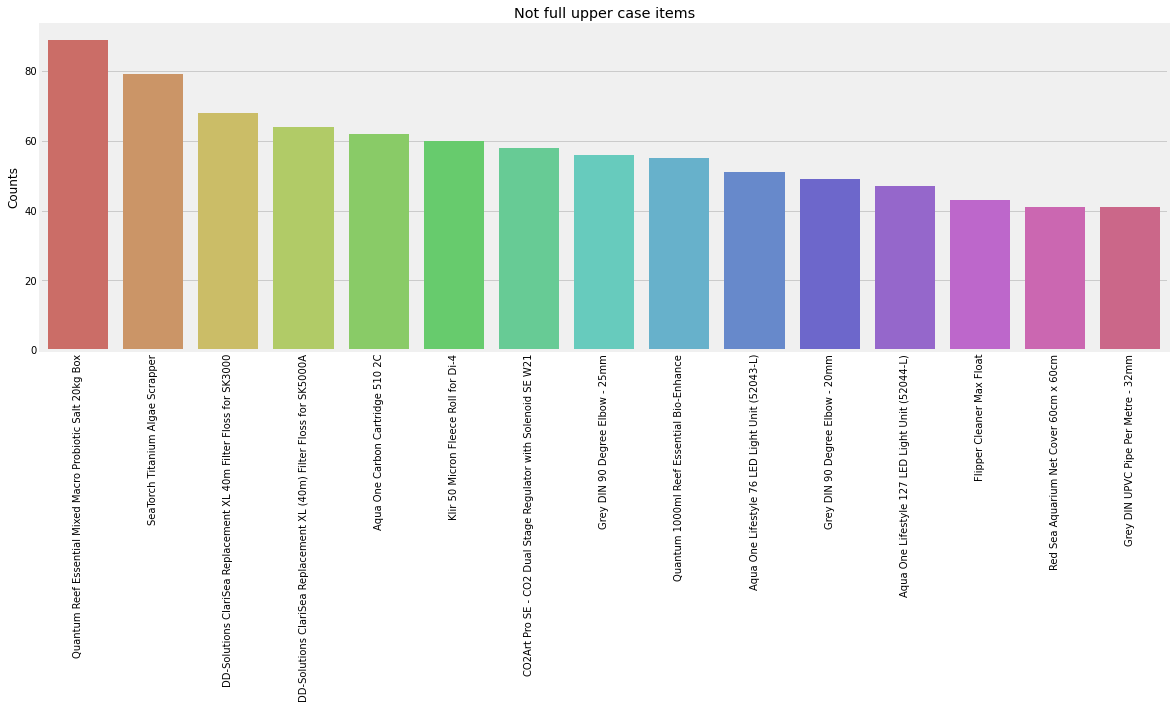

In [110]:
# Not full upper case items
lcase_counts = df[~df['Description'].str.isupper()]['Description'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=lcase_counts.index, y=lcase_counts.values, palette=sns.color_palette("hls", 15))
plt.ylabel("Counts")
plt.title("Not full upper case items");
plt.xticks(rotation=90);

- Checking out stoke codes looks like they are deeply correlated with descriptions - which makes perfect sense.

In [111]:
df['StockCode'].value_counts().head()

4983     89
12659    79
5252     71
5250     68
9098     62
Name: StockCode, dtype: int64

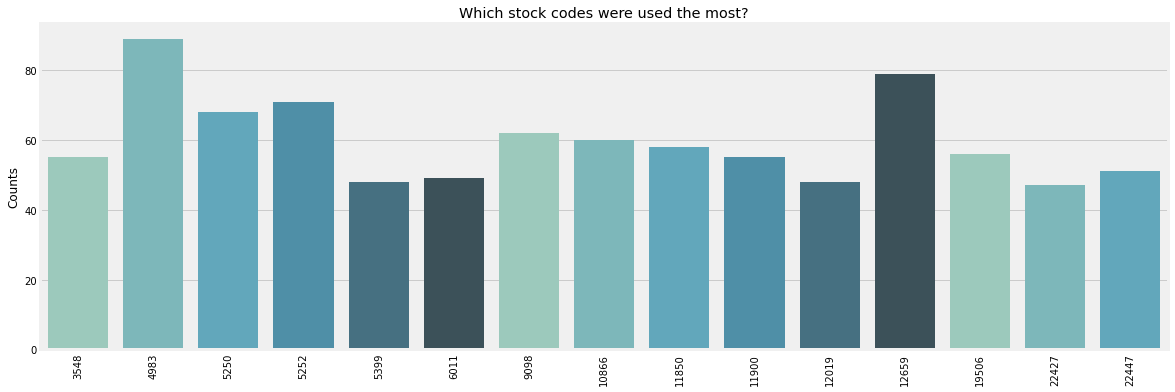

In [112]:
# Which stock codes were used the most?
stock_counts = df['StockCode'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=stock_counts.index, y=stock_counts.values, palette=sns.color_palette("GnBu_d"))
plt.ylabel("Counts")
plt.title("Which stock codes were used the most?");
plt.xticks(rotation=90);

# Checking out also InvoiceNo feature

In [113]:
df['InvoiceNo'].value_counts().tail()

77575    1
31201    1
88912    1
42494    1
69634    1
Name: InvoiceNo, dtype: int64

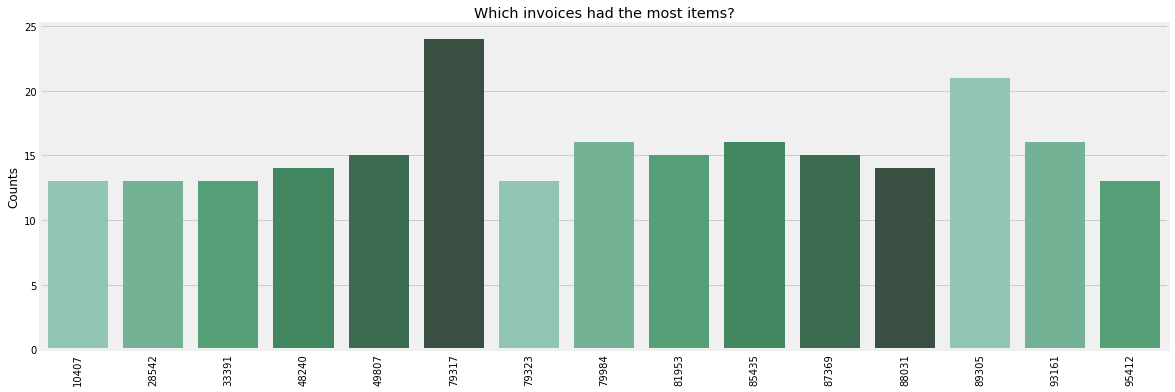

In [114]:
#  Which invoices had the most items?
inv_counts = df['InvoiceNo'].value_counts().sort_values(ascending=False).iloc[0:15]
plt.figure(figsize=(18,6))
sns.barplot(x=inv_counts.index, y=inv_counts.values, palette=sns.color_palette("BuGn_d"))
plt.ylabel("Counts")
plt.title("Which invoices had the most items?");
plt.xticks(rotation=90);

In [115]:
# df[df['Quantity'] < 0]
df[df['Quantity'] < 0].head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,State
InvoiceDate,,,,,,


- Here we can see that there is no negative value in Quantity.

In [116]:
df = df[df['Quantity'] > 0]
df.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice
count,13372.000000,13372.000000,13372.000000,13372.000000
mean,57578.927909,18938.588543,1.407493,101.616322
std,29080.752531,18273.583980,1.727285,217.971654
min,9667.000000,3449.000000,1.000000,0.180000
25%,30525.000000,8324.000000,1.000000,17.000000
50%,61916.500000,11346.000000,1.000000,38.000000
75%,87137.000000,20511.000000,1.000000,91.690000
max,95599.000000,95148.000000,150.000000,7799.980000


- As we have finished cleaning our data and removed all suspicious records we can start creating some new features for our model.
- Let's start with the most obvious one - Sales.
- We have quantities, we have prices - we can calculate the revenue.

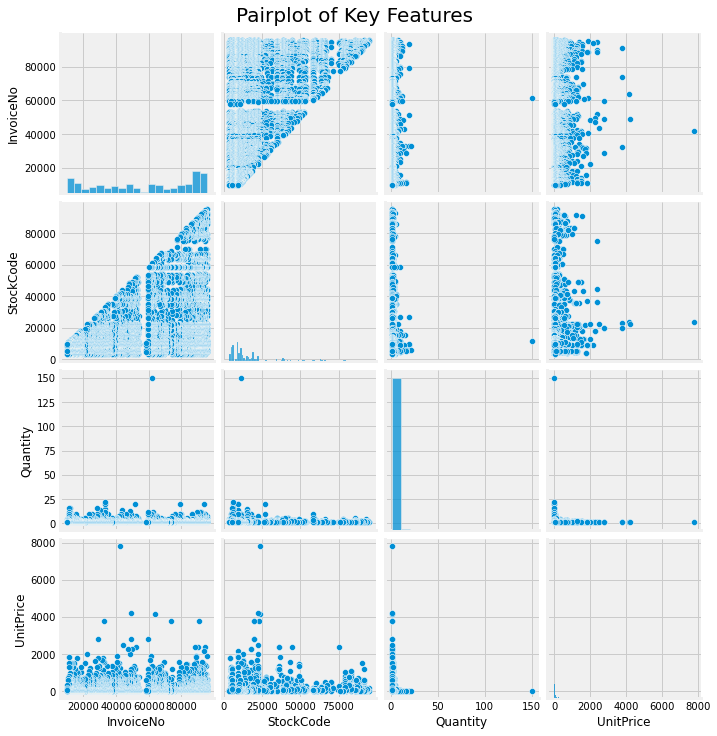

In [117]:
## Explore relationships between key features and the target variable
sns.pairplot(df)
plt.suptitle("Pairplot of Key Features", y=1.02, size=20)
plt.show()

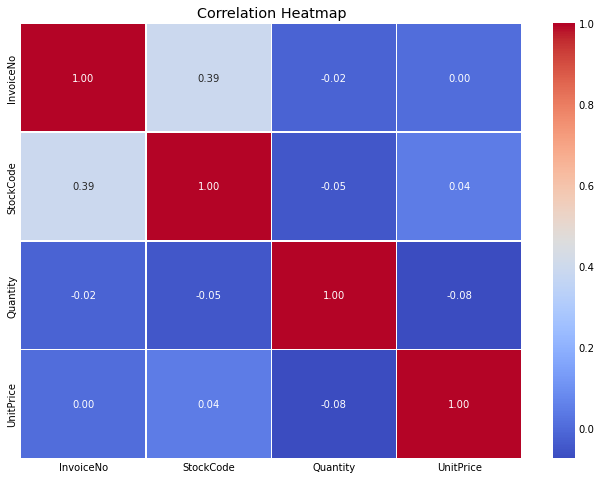

In [118]:
## Correlation heatmap to visualize the correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Visual EDA

(array([0]), [Text(0, 0, 'NSW')])

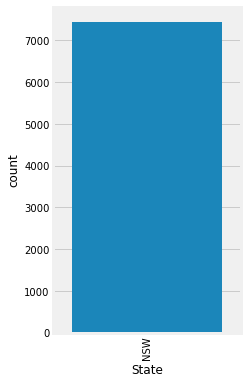

In [119]:
plt.figure(figsize=(3,6))
sns.countplot(x=df[df['State'] == 'NSW']['State'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'WA'),
  Text(1, 0, 'ACT'),
  Text(2, 0, 'QLD'),
  Text(3, 0, 'VIC'),
  Text(4, 0, 'NT'),
  Text(5, 0, 'SA'),
  Text(6, 0, 'TAS'),
  Text(7, 0, 'England'),
  Text(8, 0, 'Australia')])

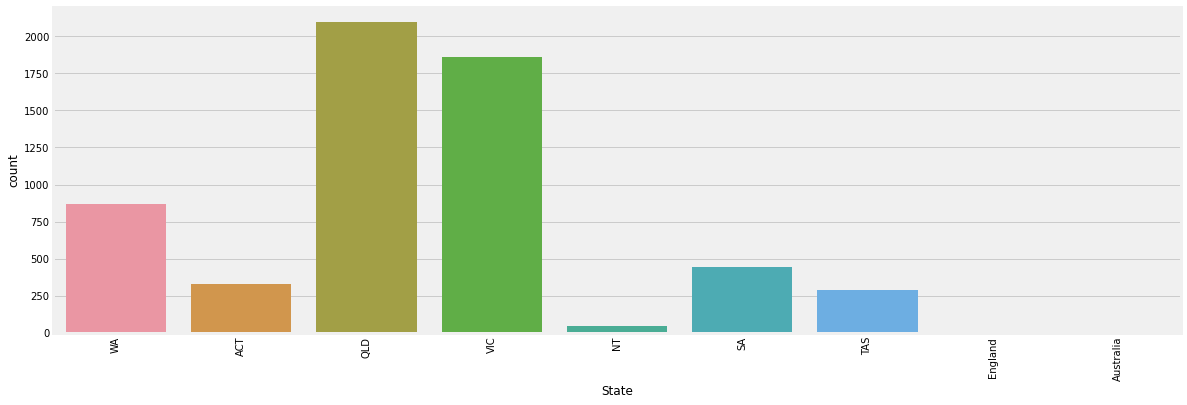

In [120]:
plt.figure(figsize=(18,6))
sns.countplot(x=df[df['State'] != 'NSW']['State'])
plt.xticks(rotation=90)

In [121]:
nsw_count = df[df['State'] == 'NSW']['State'].count()
all_count = df['State'].count()
nsw_perc = nsw_count/all_count
print(str('{0:.2f}%').format(nsw_perc*100))

55.62%


- From the above plots and calculations, we can see that the vast majority of sales were made in the NSW and 45% went outside of NSW.
- We can say our dataset is skewed to the NSW side.

# Detecting outliers
- There are a few different methods to detect outliers:

    - box plots,
    - using IQR,
    - scatter plot also works in some cases (and this is one of those).

### Detecting outliers using a scatter plot is pretty intuitive. You plot your data and remove data points that visually are definitely out of range. Like in the chart below:

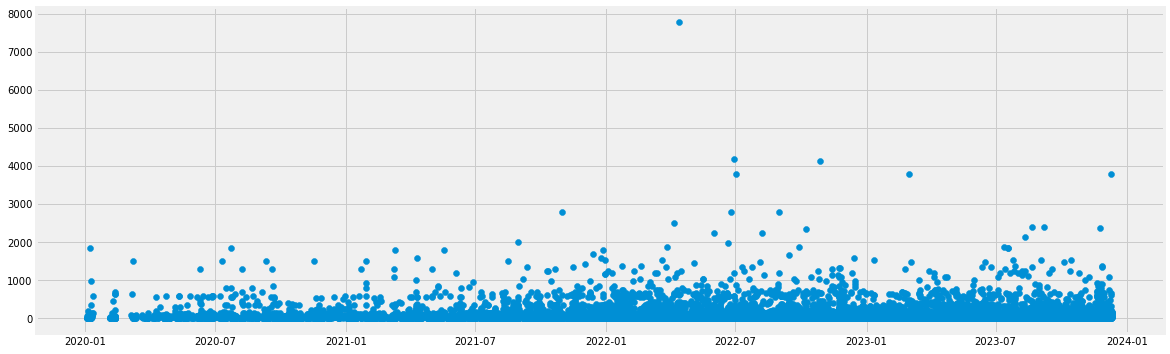

In [122]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice'])

## Remove obvious outliers:

(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

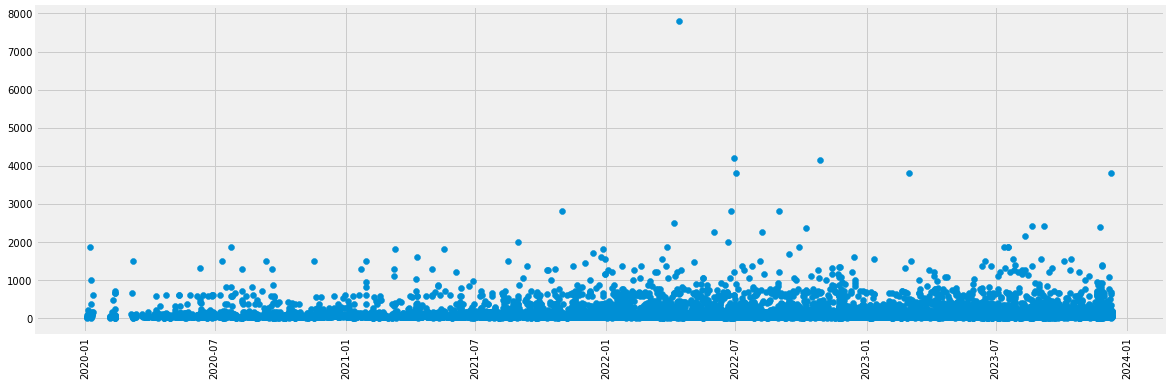

In [123]:
df = df[df['UnitPrice'] < 20000]
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['UnitPrice'])
plt.xticks(rotation=90)

- After removing obvious outliers we still see some values that are out of normal distribution.

### To understand better the distribution of our data let's check out different percentiles of our numeric features:

In [124]:
df.quantile([0.05, 0.95, 0.98, 0.99, 0.999])

,InvoiceNo,StockCode,Quantity,UnitPrice
0.050,11807.000,4524.0,1.0,4.0000
0.950,94234.750,63301.9,3.0,439.9800
0.980,94600.580,78971.0,5.0,689.0000
0.990,95413.580,85900.0,6.0,1001.6703
0.999,95585.629,92898.0,12.0,2318.8190


- We can see that if we remove the top 4% of our data points we will get rid of absolute outliers and will have a more balanced dataset.

(array([18262., 18444., 18628., 18809., 18993., 19174., 19358., 19539.,
        19723.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

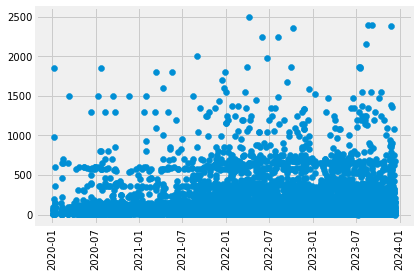

In [125]:
df_quantile = df[df['UnitPrice'] < 2500]
plt.scatter(x=df_quantile.index, y=df_quantile['UnitPrice'])
plt.xticks(rotation=90)

In [126]:
df_quantile.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice
count,13363.000000,13363.000000,13363.000000,13363.000000
mean,57581.043703,18937.134551,1.407768,98.995022
std,29086.350106,18279.591393,1.727834,189.514067
min,9667.000000,3449.000000,1.000000,0.180000
25%,30522.000000,8324.000000,1.000000,17.000000
50%,61920.000000,11343.000000,1.000000,38.000000
75%,87137.000000,20507.000000,1.000000,90.040000
max,95599.000000,95148.000000,150.000000,2499.000000


- Looks like our data is almost ready for modelling.
- We performed a clean up, we removed outliers that were disturbing the balance of our dataset, we removed invalid records.
- Now our data looks much better! and it doesn't lose it's value.

# Visually checking distribution of numeric features

<AxesSubplot:ylabel='Density'>

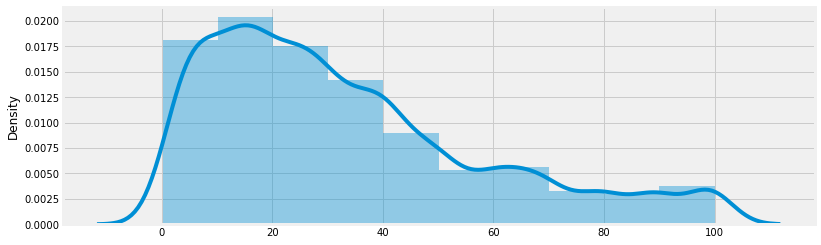

In [127]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 100]['UnitPrice'].values, kde=True, bins=10)

<AxesSubplot:ylabel='Density'>

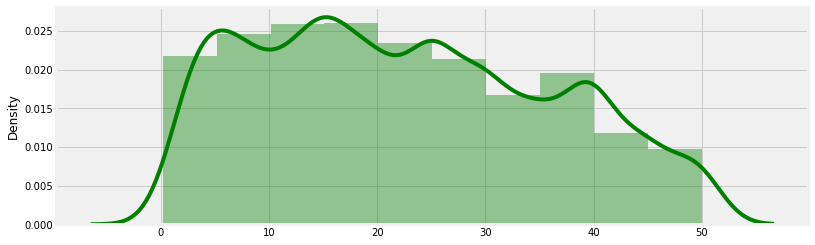

In [128]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 50]['UnitPrice'].values, kde=True, bins=10, color='green')

- From these histograms, we can see that the vast majority of items sold in this store have a low price range - 0 to 35 pounds.

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

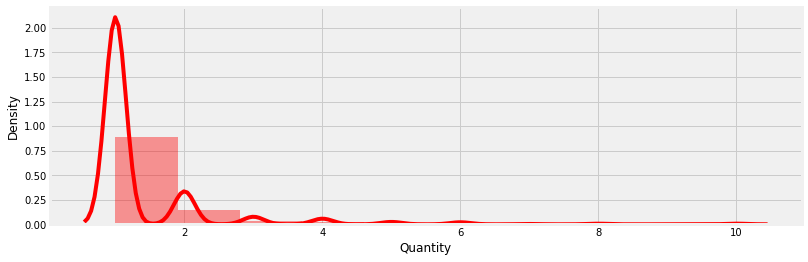

In [129]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 10]['Quantity'], kde=True, bins=10, color='red')

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

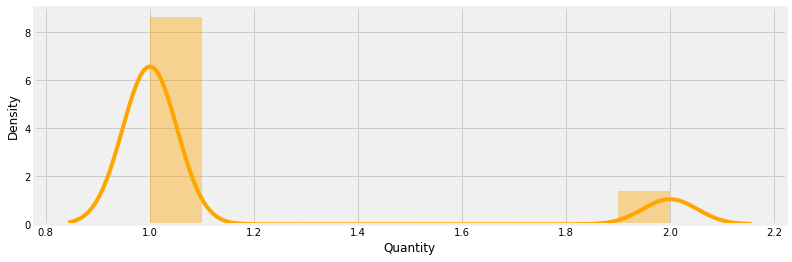

In [130]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['Quantity'] <= 2]['Quantity'], kde=True, bins=10, color='orange')

- From these histograms we can see that people bought normally 1 0r 2 items together.

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

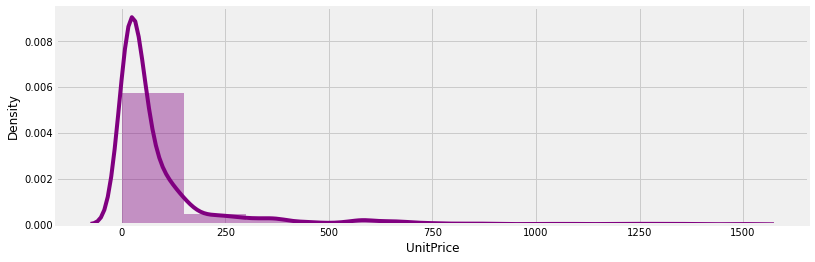

In [131]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 1500]['UnitPrice'], kde=True, bins=10, color='purple')

<AxesSubplot:xlabel='UnitPrice', ylabel='Density'>

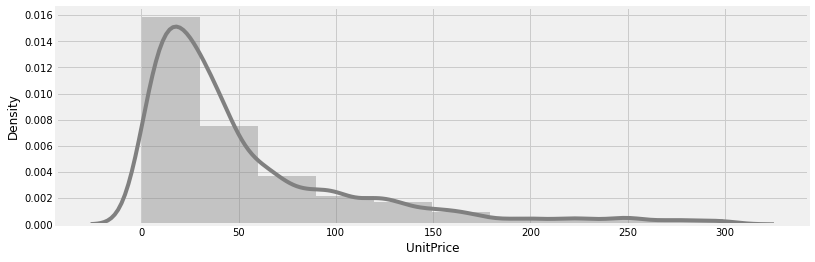

In [132]:
plt.figure(figsize=(12,4))
sns.distplot(df_quantile[df_quantile['UnitPrice'] < 300]['UnitPrice'], kde=True, bins=10, color='grey')

- From these histograms, we can understand that majority of sales per order were in the range 1-150 AUD each.

# Analysing sales over time

In [133]:
df_ts = df[['UnitPrice']]
df_ts.head()

,UnitPrice
InvoiceDate,
2023-09-12 22:58:00,85.0
2023-09-12 21:00:00,78.0
2023-09-12 20:42:00,40.0
2023-09-12 15:05:00,119.0
2023-09-12 10:24:00,45.0


- As we can see every invoice has its own timestamp (definitely based on the time the order was made).
- We can resample time data by, for example, weeks, and try to see if there are any patterns in our sales.

<AxesSubplot:xlabel='InvoiceDate'>

<Figure size 1296x432 with 0 Axes>

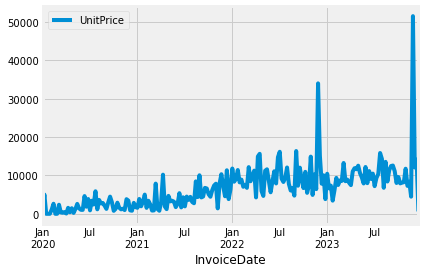

In [134]:
plt.figure(figsize=(18,6))
df_resample = df_ts.resample('W').sum()
df_resample.plot()

- That week with 0 sales in January looks suspicious, let's check it closer.

In [135]:
df_resample['03-2020':'12-2023']

,UnitPrice
InvoiceDate,
2020-03-01,0.00
2020-03-08,2371.53
2020-03-15,374.91
2020-03-22,268.93
2020-03-29,466.75
...,...
2023-11-19,4470.49
2023-11-26,51495.51
2023-12-03,12071.00


- Now it makes sense - possibly, during the march 2020 they recently open the online store and that's why they didn't make any sales.

# Preparing data for modeling and feature creation
- Now comes the most fun part of the project - building a model.
- To do this we will need to create a few more additional features to make our model more sophisticated.

In [136]:
df_clean = df[df['UnitPrice'] < 1000]
df_clean.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice
count,13238.000000,13238.000000,13238.000000,13238.000000
mean,57589.176688,18916.979831,1.411014,86.686707
std,29096.428831,18271.272187,1.735442,137.781847
min,9667.000000,3449.000000,1.000000,0.180000
25%,30507.000000,8318.000000,1.000000,17.000000
50%,61920.000000,11305.000000,1.000000,37.000000
75%,87127.750000,19883.250000,1.000000,89.000000
max,95599.000000,95148.000000,150.000000,999.910000


In [137]:
df_clean.index

DatetimeIndex(['2023-09-12 22:58:00', '2023-09-12 21:00:00',
               '2023-09-12 20:42:00', '2023-09-12 15:05:00',
               '2023-09-12 10:24:00', '2023-08-12 23:32:00',
               '2023-08-12 23:32:00', '2023-08-12 23:32:00',
               '2023-08-12 21:34:00', '2023-08-12 21:13:00',
               ...
               '2020-03-24 17:31:00', '2020-03-24 17:31:00',
               '2020-03-24 14:34:00', '2020-03-24 14:34:00',
               '2020-03-22 21:24:00', '2020-03-22 21:24:00',
               '2020-03-22 21:24:00', '2020-03-20 12:52:00',
               '2020-03-20 12:52:00', '2020-03-20 12:52:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=13238, freq=None)

# Quantity per invoice feature
- A feature that could influence the sales output could be "Quantity per invoice". Let's find the data for this feature.

In [138]:
df_join = df_clean.groupby('InvoiceNo')[['Quantity']].sum()

In [139]:
df_join = df_join.reset_index()
df_join.head()

,InvoiceNo,Quantity
0,9667,3
1,9681,3
2,9685,2
3,9686,5
4,9696,4


In [140]:
df_clean['InvoiceDate'] = df_clean.index
df_clean = df_clean.merge(df_join, how='left', on='InvoiceNo')
df_clean = df_clean.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df_clean.tail(15)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,State,InvoiceDate,QuantityInv
13223,9696,5167,Grey DIN UPVC Pipe Per Metre - 25mm,1,6.90,NSW,2020-03-29 12:20:00,4
13224,9696,6012,Grey DIN 45 Degree Elbow - (Duplicate Imported...,1,6.00,NSW,2020-03-29 12:20:00,4
13225,9686,8338,AF Vege Clip,1,37.99,NSW,2020-03-24 17:31:00,5
13226,9686,4686,Calcium 850g,1,20.98,NSW,2020-03-24 17:31:00,5
13227,9686,4683,Kh Buffer 1200g,1,25.98,NSW,2020-03-24 17:31:00,5
13228,9686,4689,Magnesium 750g,1,20.98,NSW,2020-03-24 17:31:00,5
13229,9686,4678,Reef Mineral Salt 800g,1,25.98,NSW,2020-03-24 17:31:00,5
13230,9685,8831,Hikari MARINE A 110G,1,15.99,NSW,2020-03-24 14:34:00,2
13231,9685,3548,Quantum 1000ml Reef Essential Bio-Enhance,1,39.99,NSW,2020-03-24 14:34:00,2
13232,9681,3499,Quantum Reef Essential 1000ml Aragonite B - Ca...,1,39.99,NSW,2020-03-22 21:24:00,3


In [141]:
df_clean.describe()

,InvoiceNo,StockCode,Quantity,UnitPrice,QuantityInv
count,13238.000000,13238.000000,13238.000000,13238.000000,13238.000000
mean,57589.176688,18916.979831,1.411014,86.686707,5.480208
std,29096.428831,18271.272187,1.735442,137.781847,8.269440
min,9667.000000,3449.000000,1.000000,0.180000,1.000000
25%,30507.000000,8318.000000,1.000000,17.000000,2.000000
50%,61920.000000,11305.000000,1.000000,37.000000,3.000000
75%,87127.750000,19883.250000,1.000000,89.000000,6.000000
max,95599.000000,95148.000000,150.000000,999.910000,150.000000


In [142]:
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

In [143]:
df_clean.dtypes

InvoiceNo               int64
StockCode               int64
Description            object
Quantity                int64
UnitPrice             float64
State                  object
InvoiceDate    datetime64[ns]
QuantityInv             int64
dtype: object

# Bucketing Quantity and UnitPrice features
- Based on the EDA done previously we can group these features into 6 buckets for Quantity and 5 for UnitePrice using the pandas.cut() method.

In [144]:
bins_q = pd.IntervalIndex.from_tuples([(0, 1), (1, 3), (3, 5), (5, 7), (7, 9), (9, 100)])
df_clean['QuantityRange'] = pd.cut(df_clean['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 100), (100, 200), (200, 300), (300, 500), (500, 1000)])
df_clean['PriceRange'] = pd.cut(df_clean['UnitPrice'], bins=bins_p)
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,State,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,95599,5735,Red Sea Aquarium Net Cover 60cm x 60cm,1,85.0,WA,2023-09-12 22:58:00,1,"(0, 1]","(0, 100]"
1,95598,6255,Flipper Cleaner Standard Float,1,78.0,NSW,2023-09-12 21:00:00,1,"(0, 1]","(0, 100]"
2,95597,38824,Fluval P50 Preset Submersible Heater 50W 155cm...,2,40.0,ACT,2023-09-12 20:42:00,2,"(1, 3]","(0, 100]"
3,95595,22427,Aqua One Lifestyle 127 LED Light Unit (52044-L),1,119.0,QLD,2023-09-12 15:05:00,1,"(0, 1]","(100, 200]"
4,95594,38928,Fluval Circulation Pump for FLEX 34L,1,45.0,VIC,2023-09-12 10:24:00,1,"(0, 1]","(0, 100]"


# Extracting and bucketing dates
- We have noticed that depending on the sales of new year sell differently:

    - pick of sales is in the Q4
    - then it drastically drops in Q1 of the next year
    - and continues to grow till its new pick in Q4 again.


- From this observation, we can create another feature that could improve our model.

In [145]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,State,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month
0,95599,5735,Red Sea Aquarium Net Cover 60cm x 60cm,1,85.0,WA,2023-09-12 22:58:00,1,"(0, 1]","(0, 100]",9
1,95598,6255,Flipper Cleaner Standard Float,1,78.0,NSW,2023-09-12 21:00:00,1,"(0, 1]","(0, 100]",9
2,95597,38824,Fluval P50 Preset Submersible Heater 50W 155cm...,2,40.0,ACT,2023-09-12 20:42:00,2,"(1, 3]","(0, 100]",9
3,95595,22427,Aqua One Lifestyle 127 LED Light Unit (52044-L),1,119.0,QLD,2023-09-12 15:05:00,1,"(0, 1]","(100, 200]",9
4,95594,38928,Fluval Circulation Pump for FLEX 34L,1,45.0,VIC,2023-09-12 10:24:00,1,"(0, 1]","(0, 100]",9


In [146]:
bins_d = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_d, labels=['q1','q2','q3','q4'])
df_clean.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,State,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
13233,9681,3537,Reef Essential High Range HR Nitrate Remover 1...,1,39.99,NSW,2020-03-22 21:24:00,3,"(0, 1]","(0, 100]",3,"(0, 3]"
13234,9681,3543,Quantum 500ml Reef Essential Bio-Enhance,1,24.99,NSW,2020-03-22 21:24:00,3,"(0, 1]","(0, 100]",3,"(0, 3]"
13235,9667,5227,Reef Anabolics Reef Booster 500ml - Coral Growth,1,39.99,QLD,2020-03-20 12:52:00,3,"(0, 1]","(0, 100]",3,"(0, 3]"
13236,9667,5223,Reef Anabolics Nutrition Pack 50ml,1,89.98,QLD,2020-03-20 12:52:00,3,"(0, 1]","(0, 100]",3,"(0, 3]"
13237,9667,9483,Reef Revolution 60g Polyp Feast - Coral Food,1,33.99,QLD,2020-03-20 12:52:00,3,"(0, 1]","(0, 100]",3,"(0, 3]"


# Building a model

## Splitting data into NSW and non-NSW
- We have to analyze these 2 datasets separately to have more standardized data for a model because there can be some patterns that work for other countries and do not for the NSW or vice versa.
- Also a hypothesis to test - does the model built for the NSW performs well on data for other countries?

In [147]:
df_nsw = df_clean[df_clean['State'] == 'NSW']
df_otherstate = df_clean[df_clean['State'] != 'NSW']

In [148]:
df_nsw.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,State,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
1,95598,6255,Flipper Cleaner Standard Float,1,78.00,NSW,2023-09-12 21:00:00,1,"(0, 1]","(0, 100]",9,"(6, 9]"
8,95592,59909,Aqua One Focus LP LED Reflector 8.5W - White,2,64.88,NSW,2023-08-12 21:34:00,2,"(1, 3]","(0, 100]",8,"(6, 9]"
10,95589,9098,Aqua One Carbon Cartridge 510 2C,8,6.99,NSW,2023-08-12 20:26:00,8,"(7, 9]","(0, 100]",8,"(6, 9]"
12,95587,44505,"Sera Pond Colour Sticks, 170g",1,18.00,NSW,2023-08-12 17:23:00,1,"(0, 1]","(0, 100]",8,"(6, 9]"
14,95585,91686,Red Sea ReefMat - ReefMat 250,1,570.00,NSW,2023-08-12 11:38:00,1,"(0, 1]","(500, 1000]",8,"(6, 9]"


## Extracting features and creating dummy variables

In [149]:
df_nsw_model = df_nsw[['UnitPrice', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]

In [150]:
df_nsw_model.head()

,UnitPrice,QuantityInv,QuantityRange,PriceRange,DateRange
1,78.00,1,"(0, 1]","(0, 100]","(6, 9]"
8,64.88,2,"(1, 3]","(0, 100]","(6, 9]"
10,6.99,8,"(7, 9]","(0, 100]","(6, 9]"
12,18.00,1,"(0, 1]","(0, 100]","(6, 9]"
14,570.00,1,"(0, 1]","(500, 1000]","(6, 9]"


In [151]:
df_data = df_nsw_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,UnitPrice,QuantityInv,"qr_(0, 1]","qr_(1, 3]","qr_(3, 5]","qr_(5, 7]","qr_(7, 9]","qr_(9, 100]","pr_(0, 100]","pr_(100, 200]","pr_(200, 300]","pr_(300, 500]","pr_(500, 1000]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
1,78.00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,64.88,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
10,6.99,8,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
12,18.00,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
14,570.00,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# Scaling
- As the majority of our features are in the 0-1 range it would make sense to scale the "QuantityInv" feature too.
- In general, scaling features is normally a good idea.

In [152]:
from sklearn.preprocessing import scale

df_data['QuantityInv'] = scale(df_data['QuantityInv'])

In [153]:
df_data.head()

,UnitPrice,QuantityInv,"qr_(0, 1]","qr_(1, 3]","qr_(3, 5]","qr_(5, 7]","qr_(7, 9]","qr_(9, 100]","pr_(0, 100]","pr_(100, 200]","pr_(200, 300]","pr_(300, 500]","pr_(500, 1000]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
1,78.00,-0.480393,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
8,64.88,-0.374394,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
10,6.99,0.261600,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
12,18.00,-0.480393,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
14,570.00,-0.480393,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


# Train-Test Split
- Now we have to split our data into train-test data to be able to train our model and validate its capabilities.

In [154]:
y = df_data['UnitPrice']
X = df_data.drop(columns=['UnitPrice'])

In [155]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

# Testing and validating different models
- We use GridSearch and CrossValidation to test three types of regressors:
    - Linear
    - Decision Tree
    - RandomForest

In [156]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [157]:
# Add a constant term for the intercept
X_train_with_const = sm.add_constant(X_train)

# Fit the model
model_stats = sm.OLS(y_train, X_train_with_const).fit()

# Display the summary
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              UnitPrice   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     7077.
Date:                Mon, 11 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:53:03   Log-Likelihood:                -28976.
No. Observations:                5877   AIC:                         5.798e+04
Df Residuals:                    5861   BIC:                         5.809e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.466e+12   1.24e+13     -0.

# Linear Regression

In [158]:
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree

In [159]:
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest

In [160]:
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

# Testing and validating

In [161]:
cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}

for model in models_to_test:
  regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)

  # Print the tuned parameters and score
  print(" === Start report for regressor {} ===".format(model))
  score_dict[model] = regressor.best_score_
  print("Tuned Parameters: {}".format(regressor.best_params_)) 
  params_dict = regressor.best_params_
  print("Best score is {}".format(regressor.best_score_))

  # Compute metrics
  mae_dict[model] = mean_absolute_error(y_test, y_pred)
  print("MAE for {}".format(model))
  print(mean_absolute_error(y_test, y_pred))
  mse_dict[model] = mean_squared_error(y_test, y_pred)
  print("MSE for {}".format(model))
  print(mean_squared_error(y_test, y_pred))
  r2_dict[model] = r2_score(y_test, y_pred)
  print("R2 score for {}".format(model))
  print(r2_score(y_test, y_pred))
  print(" === End of report for regressor {} === \n".format(model))
  
  # Add best estimator to the dict
  best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}
Best score is -9.585057210334634e+18
MAE for LinearRegression
22.63888775510204
MSE for LinearRegression
1053.4258349659863
R2 score for LinearRegression
0.9442281400408045
 === End of report for regressor LinearRegression === 

 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}
Best score is 0.9440982521581802
MAE for DecisionTreeRegressor
21.947898203924467
MSE for DecisionTreeRegressor
1095.80836680777
R2 score for DecisionTreeRegressor
0.9419842681400622
 === End of report for regressor DecisionTreeRegressor === 

 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100}
Best score is 0.9458324269148948
MAE for RandomForest
21.78663032585083
MSE for RandomForest
1076.4985400025082
R2 score for RandomForest
0.9430065944592702
 === End of rep

# Creating summary report

In [162]:
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results

<AxesSubplot:title={'center':'Regressor Comparison'}, xlabel='Best Score', ylabel='Regressor'>

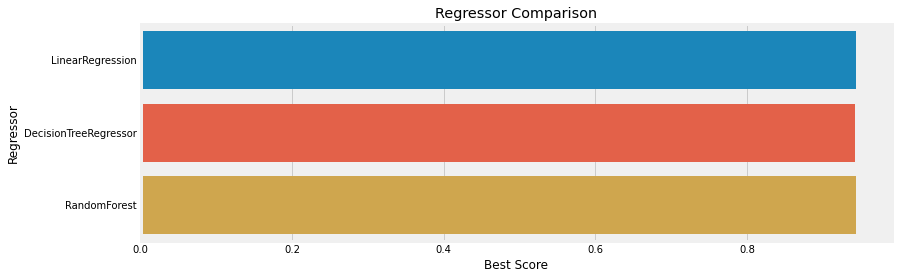

In [163]:
plt.figure(figsize=(12,4))
plt.xlabel('Best score')
plt.title('Regressor Comparison')

sns.barplot(x='Best Score', y='Regressor', data=summary)

# Conclusions
- This is a basic analysis of a transactions dataset with a model that predicts sales.

- Random Forest Regressor appears to be the best model for our prediction with an R2 score of more than 0.6 which is not that bad.

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred_test = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
r_squared = r2_score(y_test, y_pred_test)

print("Mean Squared Error on Test Data:", mse)
print("R-squared on Test Data:", r_squared)


Mean Squared Error on Test Data: 1053.4258349659863
R-squared on Test Data: 0.9442281400408045


# Generate random data for demonstration
np.random.seed(42)
months = pd.date_range(start='2020-01-01', end='2023-12-01', freq='M')
all_sales = np.random.randint(100, 300, size=len(months))

# Create a DataFrame with random features for the months
features = pd.DataFrame({
    'QuantityInv': np.random.rand(len(months)),
    'qr_(0, 1]': np.random.randint(0, 2, size=len(months)),
    'qr_(1, 3]': np.random.randint(0, 2, size=len(months)),
    'qr_(3, 5]': np.random.randint(0, 2, size=len(months)),
    'qr_(5, 7]': np.random.randint(0, 2, size=len(months)),
    'qr_(7, 9]': np.random.randint(0, 2, size=len(months)),
    'qr_(9, 100]': np.random.randint(0, 2, size=len(months)),
    'pr_(0, 100]': np.random.randint(0, 2, size=len(months)),
    'pr_(100, 200]': np.random.randint(0, 2, size=len(months)),
    'pr_(200, 300]': np.random.randint(0, 2, size=len(months)),
    'pr_(300, 500]': np.random.randint(0, 2, size=len(months)),
    'pr_(500, 1000]': np.random.randint(0, 2, size=len(months)),
    'dr_(0, 3]': np.random.randint(0, 2, size=len(months)),
    'dr_(3, 6]': np.random.randint(0, 2, size=len(months)),
    'dr_(6, 9]': np.random.randint(0, 2, size=len(months)),
    'dr_(9, 12]': np.random.randint(0, 2, size=len(months)),
})

# Split the data into train and test sets
train_size = int(len(months) * 0.8)  # 80% train, 20% test
train_sales, test_sales = all_sales[:train_size], all_sales[train_size:]
train_features, test_features = features[:train_size], features[train_size:]

# Train the model on the training data
model = LinearRegression()
model.fit(train_features, train_sales)

# Predict sales for both train and test data
train_predicted_sales = model.predict(train_features)
test_predicted_sales = model.predict(test_features)

# Plot the trends for train and test data
plt.figure(figsize=(12, 8))

# Plot the trend of actual sales for both train and test data
plt.plot(months[:train_size], train_sales, label='Actual Train Sales', marker='o', color='blue')
plt.plot(months[train_size:], test_sales, label='Actual Test Sales', marker='o', color='green')

# Plot the trend of predicted sales for both train and test data
plt.plot(months[:train_size], train_predicted_sales, label='Predicted Train Sales', linestyle='dashed', marker='x', color='orange')
plt.plot(months[train_size:], test_predicted_sales, label='Predicted Test Sales', linestyle='dashed', marker='x', color='red')

# Customize the plot
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Actual and Predicted Sales Trend Over Time (Monthly)')
plt.legend()
plt.grid(True)
plt.show()


# Sample data for demonstration (replace this with your actual training data)
train_data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', end='2022-12-31', freq='M'),
    'UnitPrice': np.random.randint(100, 300, size=36),
    'QuantityInv': np.random.rand(36),
    'qr_(0, 1]': np.random.randint(0, 2, size=36),
    'qr_(1, 3]': np.random.randint(0, 2, size=36),
    'qr_(3, 5]': np.random.randint(0, 2, size=36),
    'qr_(5, 7]': np.random.randint(0, 2, size=36),
    'qr_(7, 9]': np.random.randint(0, 2, size=36),
    'qr_(9, 100]': np.random.randint(0, 2, size=36),
    'pr_(0, 100]': np.random.randint(0, 2, size=36),
    'pr_(100, 200]': np.random.randint(0, 2, size=36),
    'pr_(200, 300]': np.random.randint(0, 2, size=36),
    'pr_(300, 500]': np.random.randint(0, 2, size=36),
    'pr_(500, 1000]': np.random.randint(0, 2, size=36),
    'dr_(0, 3]': np.random.randint(0, 2, size=36),
    'dr_(3, 6]': np.random.randint(0, 2, size=36),
    'dr_(6, 9]': np.random.randint(0, 2, size=36),
    'dr_(9, 12]': np.random.randint(0, 2, size=36),
})

# Extract features and sales from the training data
train_features = train_data[['QuantityInv', 'qr_(0, 1]', 'qr_(1, 3]', 'qr_(3, 5]', 'qr_(5, 7]', 'qr_(7, 9]',
                             'qr_(9, 100]', 'pr_(0, 100]', 'pr_(100, 200]', 'pr_(200, 300]', 'pr_(300, 500]',
                             'pr_(500, 1000]', 'dr_(0, 3]', 'dr_(3, 6]', 'dr_(6, 9]', 'dr_(9, 12]']]
train_sales = train_data['UnitPrice']

# Train a model using the training data
model = LinearRegression()
model.fit(train_features, train_sales)

# Generate synthetic test data for demonstration purposes
test_data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', end='2023-12-31', freq='M'),
    'QuantityInv': np.random.rand(12),
    'qr_(0, 1]': np.random.randint(0, 2, size=12),
    'qr_(1, 3]': np.random.randint(0, 2, size=12),
    'qr_(3, 5]': np.random.randint(0, 2, size=12),
    'qr_(5, 7]': np.random.randint(0, 2, size=12),
    'qr_(7, 9]': np.random.randint(0, 2, size=12),
    'qr_(9, 100]': np.random.randint(0, 2, size=12),
    'pr_(0, 100]': np.random.randint(0, 2, size=12),
    'pr_(100, 200]': np.random.randint(0, 2, size=12),
    'pr_(200, 300]': np.random.randint(0, 2, size=12),
    'pr_(300, 500]': np.random.randint(0, 2, size=12),
    'pr_(500, 1000]': np.random.randint(0, 2, size=12),
    'dr_(0, 3]': np.random.randint(0, 2, size=12),
    'dr_(3, 6]': np.random.randint(0, 2, size=12),
    'dr_(6, 9]': np.random.randint(0, 2, size=12),
    'dr_(9, 12]': np.random.randint(0, 2, size=12),
})

# Extract features from the synthetic test data
test_features = test_data[['QuantityInv', 'qr_(0, 1]', 'qr_(1, 3]', 'qr_(3, 5]', 'qr_(5, 7]', 'qr_(7, 9]',
                           'qr_(9, 100]', 'pr_(0, 100]', 'pr_(100, 200]', 'pr_(200, 300]', 'pr_(300, 500]',
                           'pr_(500, 1000]', 'dr_(0, 3]', 'dr_(3, 6]', 'dr_(6, 9]', 'dr_(9, 12]']]

# Predict sales using the trained model
test_predicted_sales = model.predict(test_features)

# Plot the trends for both train and test data
plt.figure(figsize=(12, 8))

# Plot the trend of actual sales for the training data
plt.plot(train_data['Date'], train_sales, label='Actual Train Sales', marker='o', color='blue')

# Plot the trend of predicted sales for the training data
train_predicted_sales = model.predict(train_features)
plt.plot(train_data['Date'], train_predicted_sales, label='Predicted Train Sales', linestyle='dashed', marker='x', color='orange')

# Plot the trend of predicted sales for the test data
plt.plot(test_data['Date'], test_predicted_sales, label='Predicted Test Sales', linestyle='dashed', marker='x', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual and Predicted Sales Trend Over Time (Monthly)')
plt.legend()
plt.grid(True)
plt.show()




# Sample data for demonstration (replace this with your actual training data)
train_data = pd.DataFrame({
    'Date': pd.date_range(start='2020-01-01', end='2022-12-31', freq='M'),
    'UnitPrice': np.random.randint(100, 300, size=36),
    'QuantityInv': np.random.rand(36),
    'qr_(0, 1]': np.random.randint(0, 2, size=36),
    'qr_(1, 3]': np.random.randint(0, 2, size=36),
    'qr_(3, 5]': np.random.randint(0, 2, size=36),
    'qr_(5, 7]': np.random.randint(0, 2, size=36),
    'qr_(7, 9]': np.random.randint(0, 2, size=36),
    'qr_(9, 100]': np.random.randint(0, 2, size=36),
    'pr_(0, 100]': np.random.randint(0, 2, size=36),
    'pr_(100, 200]': np.random.randint(0, 2, size=36),
    'pr_(200, 300]': np.random.randint(0, 2, size=36),
    'pr_(300, 500]': np.random.randint(0, 2, size=36),
    'pr_(500, 1000]': np.random.randint(0, 2, size=36),
    'dr_(0, 3]': np.random.randint(0, 2, size=36),
    'dr_(3, 6]': np.random.randint(0, 2, size=36),
    'dr_(6, 9]': np.random.randint(0, 2, size=36),
    'dr_(9, 12]': np.random.randint(0, 2, size=36),
})

# Extract features and sales from the training data
train_features = train_data[['QuantityInv', 'qr_(0, 1]', 'qr_(1, 3]', 'qr_(3, 5]', 'qr_(5, 7]', 'qr_(7, 9]',
                             'qr_(9, 100]', 'pr_(0, 100]', 'pr_(100, 200]', 'pr_(200, 300]', 'pr_(300, 500]',
                             'pr_(500, 1000]', 'dr_(0, 3]', 'dr_(3, 6]', 'dr_(6, 9]', 'dr_(9, 12]']]
train_sales = train_data['UnitPrice']

# Train a model using the training data
model = LinearRegression()
model.fit(train_features, train_sales)

# Generate features for the year 2024
start_date_2024 = datetime(2024, 1, 1)
end_date_2024 = datetime(2024, 12, 31)
features_2024 = pd.DataFrame({
    'QuantityInv': np.random.rand(12),  # Replace with actual values or use your feature generation logic
    'qr_(0, 1]': np.random.randint(0, 2, size=12),
    'qr_(1, 3]': np.random.randint(0, 2, size=12),
    'qr_(3, 5]': np.random.randint(0, 2, size=12),
    'qr_(5, 7]': np.random.randint(0, 2, size=12),
    'qr_(7, 9]': np.random.randint(0, 2, size=12),
    'qr_(9, 100]': np.random.randint(0, 2, size=12),
    'pr_(0, 100]': np.random.randint(0, 2, size=12),
    'pr_(100, 200]': np.random.randint(0, 2, size=12),
    'pr_(200, 300]': np.random.randint(0, 2, size=12),
    'pr_(300, 500]': np.random.randint(0, 2, size=12),
    'pr_(500, 1000]': np.random.randint(0, 2, size=12),
    'dr_(0, 3]': np.random.randint(0, 2, size=12),
    'dr_(3, 6]': np.random.randint(0, 2, size=12),
    'dr_(6, 9]': np.random.randint(0, 2, size=12),
    'dr_(9, 12]': np.random.randint(0, 2, size=12),
}, index=pd.date_range(start=start_date_2024, end=end_date_2024, freq='M'))

# Predict sales for the year 2024
predicted_sales_2024 = model.predict(features_2024)

# Plot the trends for both train and 2024 predicted data
plt.figure(figsize=(12, 8))

# Plot the trend of actual sales for the training data
plt.plot(train_data['Date'], train_sales, label='Actual Train Sales', marker='o', color='blue')

# Plot the trend of predicted sales for the training data
train_predicted_sales = model.predict(train_features)
plt.plot(train_data['Date'], train_predicted_sales, label='Predicted Train Sales', linestyle='dashed', marker='x', color='orange')

# Plot the trend of predicted sales for the year 2024
plt.plot(features_2024.index, predicted_sales_2024, label='Predicted 2024 Sales', linestyle='dashed', marker='x', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual and Predicted Sales Trend Over Time (Monthly)')
plt.legend()
plt.grid(True)
plt.show()




# Assuming you have a trained model named 'model'

# Generate features for the year 2024
start_date_2024 = datetime(2024, 1, 1)
end_date_2024 = datetime(2024, 12, 31)
features_2024 = pd.DataFrame({
    'QuantityInv': np.random.rand(12),  # Replace with actual values or use your feature generation logic
    'qr_(0, 1]': np.random.randint(0, 2, size=12),
    'qr_(1, 3]': np.random.randint(0, 2, size=12),
    'qr_(3, 5]': np.random.randint(0, 2, size=12),
    'qr_(5, 7]': np.random.randint(0, 2, size=12),
    'qr_(7, 9]': np.random.randint(0, 2, size=12),
    'qr_(9, 100]': np.random.randint(0, 2, size=12),
    'pr_(0, 100]': np.random.randint(0, 2, size=12),
    'pr_(100, 200]': np.random.randint(0, 2, size=12),
    'pr_(200, 300]': np.random.randint(0, 2, size=12),
    'pr_(300, 500]': np.random.randint(0, 2, size=12),
    'pr_(500, 1000]': np.random.randint(0, 2, size=12),
    'dr_(0, 3]': np.random.randint(0, 2, size=12),
    'dr_(3, 6]': np.random.randint(0, 2, size=12),
    'dr_(6, 9]': np.random.randint(0, 2, size=12),
    'dr_(9, 12]': np.random.randint(0, 2, size=12),
}, index=pd.date_range(start=start_date_2024, end=end_date_2024, freq='M'))

# Predict sales for the year 2024 using the trained model
predicted_sales_2024 = model.predict(features_2024)

# Plot the trends for the predicted data
plt.figure(figsize=(12, 8))

# Plot the trend of predicted sales for the year 2024
plt.plot(features_2024.index, predicted_sales_2024, label='Predicted 2024 Sales', linestyle='dashed', marker='x', color='red')

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Predicted Sales Trend for 2024 (Monthly)')
plt.legend()
plt.grid(True)
plt.show()


In [165]:
import pandas as pd

# Assuming you have a trained model named 'model'
# model = ...

# Create a dictionary with feature values
feature_values = {
    'QuantityInv': -0.480393,
    'qr_(0, 1]': 1,
    'qr_(1, 3]': 0,
    'qr_(3, 5]': 0,
    'qr_(5, 7]': 0,
    'qr_(7, 9]': 0,
    'qr_(9, 100]': 0,
    'pr_(0, 100]': 1,
    'pr_(100, 200]': 0,
    'pr_(200, 300]': 0,
    'pr_(300, 500]': 0,
    'pr_(500, 1000]': 0,
    'dr_(0, 3]': 0,
    'dr_(3, 6]': 0,
    'dr_(6, 9]': 1,
    'dr_(9, 12]': 0
}

# Convert the dictionary to a DataFrame
input_data = pd.DataFrame([feature_values])

# Predict the target variable for the given feature values
predicted_target = model.predict(input_data)

print("Predicted Target Variable:", predicted_target)


Predicted Target Variable: [37.78125]
